In [20]:
#!/usr/bin/env python

'''
GA Data Science Q2 2016

Code walk-through 14: Dimensionality reduction

* Multidimensional scaling (MDS)
* Principal component analysis (PCA)
* Partial least squares (PLS) regression
'''

import numpy as np
import pandas as pd

from sklearn import preprocessing, cross_validation as cv, grid_search,\
                    manifold, decomposition as dec,\
                    cross_decomposition as cross_dec

from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
BOROUGHS_URL = 'https://files.datapress.com/london/dataset/london-borough-profiles/2015-09-24T15:49:52/london-borough-profiles.csv'

# Read in the London Borough Profiles datasets
boroughs = pd.read_csv(BOROUGHS_URL)

In [3]:
boroughs.columns

Index([u'Code', u'Area name', u'Inner/ Outer London',
       u'GLA Population Estimate 2015', u'GLA Household Estimate 2015',
       u'Inland Area (Hectares)', u'Population density (per hectare) 2015',
       u'Average Age, 2015', u'Proportion of population aged 0-15, 2015',
       u'Proportion of population of working-age, 2015',
       u'Proportion of population aged 65 and over, 2015',
       u'Net internal migration (2014)', u'Net international migration (2014)',
       u'Net natural change (2014)',
       u'% of resident population born abroad (2014)',
       u'Largest migrant population by country of birth (2011)',
       u'% of largest migrant population (2011)',
       u'Second largest migrant population by country of birth (2011)',
       u'% of second largest migrant population (2011)',
       u'Third largest migrant population by country of birth (2011)',
       u'% of third largest migrant population (2011)',
       u'% of population from BAME groups (2013)',
       u'% peo

In [4]:
# Filter the DataFrame so that only boroughs are included
boroughs = boroughs[boroughs.Code.str.startswith('E09', na=False)]

# Select columns of interest
boroughs = boroughs[[
    'Area name',
    'Population density (per hectare) 2015',
    'Proportion of population aged 0-15, 2015',
    'Proportion of population of working-age, 2015',
    'Proportion of population aged 65 and over, 2015',
    '% of resident population born abroad (2014)',
    'Unemployment rate (2014)',
    'Gross Annual Pay, (2014)',
    'Modelled Household median income estimates 2012/13',
    'Number of active businesses, 2013',
    'Two-year business survival rates (started in 2011)',
    'Crime rates per thousand population 2014/15',
    'Fires per thousand population (2014)',
    'Ambulance incidents per hundred population (2014)',
    'Median House Price, 2014',
    '% of area that is Greenspace, 2005',
    'Total carbon emissions (2013)',
    'Household Waste Recycling Rate, 2013/14',
    'Number of cars, (2011 Census)',
    'Number of cars per household, (2011 Census)',
    '% of adults who cycle at least once per month, 2013/14',
    'Average Public Transport Accessibility score, 2014',
    'Male life expectancy, (2011-13)',
    'Female life expectancy, (2011-13)',
    'Teenage conception rate (2013)',
    'Life satisfaction score 2011-14 (out of 10)',
    'Worthwhileness score 2011-14 (out of 10)',
    'Happiness score 2011-14 (out of 10)',
    'Anxiety score 2011-14 (out of 10)',
    'Childhood Obesity Prevalance (%) 2013/14',
    'People aged 17+ with diabetes (%)',
    'Mortality rate from causes considered preventable'
]]

In [5]:
# Set row names (index)
boroughs.set_index('Area name', inplace=True)

# Remove boroughs with missing values
boroughs.dropna(inplace=True)

In [6]:
# Extract information on ‘feelings’
col_idx = [
    'Life satisfaction score 2011-14 (out of 10)',
    'Worthwhileness score 2011-14 (out of 10)',
    'Happiness score 2011-14 (out of 10)',
    'Anxiety score 2011-14 (out of 10)'
]
feelings = boroughs[col_idx]
boroughs.drop(col_idx, axis=1, inplace=True)

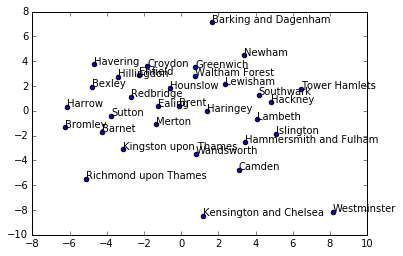

In [7]:
'''
Multidimensional scaling (MDS)
'''
#
# Create a pipeline that scales the data and performs MDS
smds = Pipeline([
    ('scale', preprocessing.StandardScaler()),
    ('mds', manifold.MDS())
])

# Two-dimensional projection (‘embedding’) of 'boroughs'
# If 2 points are close by this means they are more similar
boroughs_mds = smds.fit_transform(boroughs)

fig, ax = plt.subplots()
ax.scatter(boroughs_mds[:,0], boroughs_mds[:,1])
for i, name in enumerate(boroughs.index):
    ax.annotate(name, boroughs_mds[i,:])

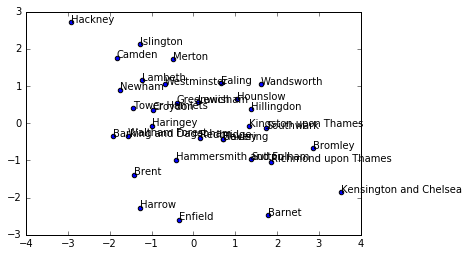

In [8]:
# If 2 points are close by this means they are more similar
boroughs_mds = smds.fit_transform(feelings)

fig, ax = plt.subplots()
ax.scatter(boroughs_mds[:,0], boroughs_mds[:,1])
for i, name in enumerate(boroughs.index):
    ax.annotate(name, boroughs_mds[i,:])

In [9]:
'''
Principal component analysis (PCA)
'''

# Create a pipeline that scales the data and performs PCA
spca = Pipeline([
    ('scale', preprocessing.StandardScaler()),
    ('pca', dec.PCA())
])

# Scores (projection of 'boroughs' on the PCs)
scores = spca.fit_transform(boroughs)

In [10]:
# first component cpatures the most variance, second captres variance not captures by the first etc.
#32 boroughs, 27 represents how many dimensions the data has been reduced to
scores.shape

(32L, 27L)

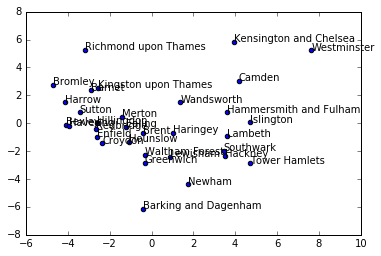

In [11]:
# Scores plot; plotting first 2 components
fig, ax = plt.subplots()
ax.scatter(scores[:,0], scores[:,1])
for i, name in enumerate(boroughs.index):
    ax.annotate(name, scores[i,0:2])

In [12]:
# Loadings (coefficients defining the PCs)
spca.named_steps['pca'].components_

array([[  2.87654912e-01,  -1.83255713e-01,   2.79835195e-01,
         -2.18135179e-01,   1.56194639e-01,   8.97651643e-02,
          1.13775875e-01,   1.06091041e-01,   1.67087250e-01,
         -1.40476073e-01,   2.70862167e-01,   1.93987411e-01,
          1.79422343e-01,   1.91065759e-01,  -2.23288323e-01,
          1.26030803e-01,  -2.22968475e-01,  -2.53878235e-01,
         -2.96162319e-01,   1.34230104e-01,   2.97395804e-01,
         -1.20917782e-01,  -2.91543741e-02,  -3.36580891e-04,
          1.60928277e-01,  -1.32488333e-01,   2.01920718e-01],
       [ -2.08252853e-02,  -2.40955296e-01,  -1.16902484e-02,
          2.03867349e-01,   4.00332047e-03,  -2.70189128e-01,
          3.06188998e-01,   3.15199039e-01,   1.92200085e-01,
          7.82869421e-02,   7.88698828e-02,  -9.50603036e-02,
          3.26595942e-02,   2.61414827e-01,   8.09789800e-02,
          8.57229519e-02,   7.91054337e-02,   3.27262141e-02,
          6.79346838e-02,   1.53418420e-01,   7.94974842e-02,
       

In [14]:
# interesting to see -ve/+sign and what variable have similar contributions
# sparce pca allows us to see which variables are set to zero
list(zip(boroughs.columns, spca.named_steps['pca'].components_[:,0]))

[('Population density (per hectare) 2015', 0.28765491180117975),
 ('Proportion of population aged 0-15, 2015', -0.020825285332785513),
 ('Proportion of population of working-age, 2015', 0.1332642633304415),
 ('Proportion of population aged 65 and over, 2015', -0.094174091280762234),
 ('% of resident population born abroad (2014)', 0.04764844676209104),
 ('Unemployment rate (2014)', -0.015067616561835168),
 ('Gross Annual Pay, (2014)', 0.16699181988419318),
 ('Modelled Household median income estimates 2012/13', -0.084249467129657071),
 ('Number of active businesses, 2013', 0.11808171021735932),
 ('Two-year business survival rates (started in 2011)', -0.20607077085488168),
 ('Crime rates per thousand population 2014/15', 0.13295233230159095),
 ('Fires per thousand population (2014)', 0.031319681095019834),
 ('Ambulance incidents per hundred population (2014)', 0.10434200241647353),
 ('Median House Price, 2014', -0.013621788489062486),
 ('% of area that is Greenspace, 2005', -0.144489905

In [15]:
# Explained variance; contifbution of each invidual componenet to the variance (total variance is 27, so below matrix is
cumulative, first component explains 10.3 and second would explain 17-10 variance)
spca.named_steps['pca'].explained_variance_
np.cumsum(spca.named_steps['pca'].explained_variance_)

array([ 10.36852718,  17.37469119,  20.58946488,  22.50476176,
        23.53464997,  24.24833034,  24.88407425,  25.40722813,
        25.76806583,  26.07747219,  26.28937478,  26.43415595,
        26.56878854,  26.67192499,  26.75186111,  26.82840863,
        26.89816222,  26.93097106,  26.95229723,  26.96660551,
        26.97807732,  26.98760819,  26.99433723,  26.99693604,
        26.99895514,  26.99998828,  27.        ])

In [ ]:
#first componet explains 10/27 (37%)

In [16]:
# Explained variance ratio
spca.named_steps['pca'].explained_variance_ratio_

array([  3.84019525e-01,   2.59487556e-01,   1.19065692e-01,
         7.09369215e-02,   3.81440077e-02,   2.64326064e-02,
         2.35460707e-02,   1.93760696e-02,   1.33643592e-02,
         1.14594949e-02,   7.84824410e-03,   5.36226570e-03,
         4.98639215e-03,   3.81986837e-03,   2.96059722e-03,
         2.83509328e-03,   2.58346610e-03,   1.21514243e-03,
         7.89858107e-04,   5.29936411e-04,   4.24881902e-04,
         3.52995004e-04,   2.49223859e-04,   9.62521351e-05,
         7.47814181e-05,   3.82644317e-05,   4.34078470e-07])

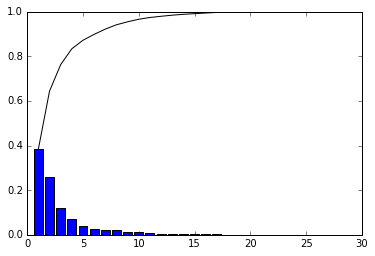

In [17]:
# line represents cumulative sum, if line grows very quickly it indicates there is alot of correlation in the data
# otherwise sometimes the cumulative explained variance will grow slowly
# Scree plot
plt.bar(np.arange(1, spca.named_steps['pca'].n_components_ + 1) - 0.4,\
        spca.named_steps['pca'].explained_variance_ratio_)
cum_evr = np.cumsum(spca.named_steps['pca'].explained_variance_ratio_)
plt.plot(np.arange(1, spca.named_steps['pca'].n_components_ + 1), cum_evr,\
         color='black')

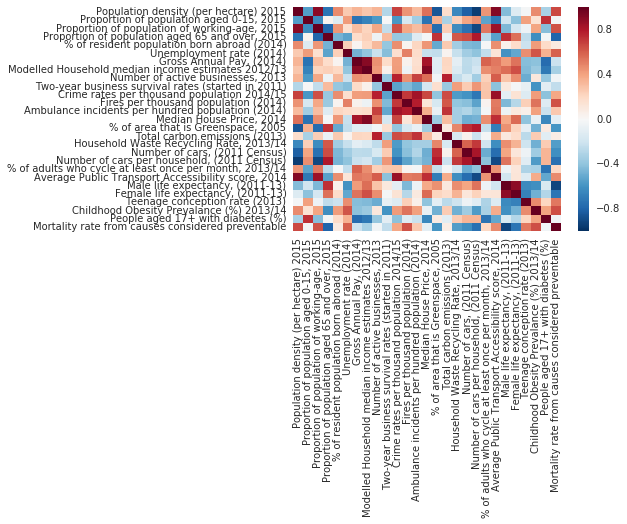

In [21]:
sns.heatmap(boroughs.corr())

In [ ]:
# if you have alot of random variance in your x due to random measurements for example, pca will pick this up
# which is not optimal, if pca worked you would discover this through regression
# if using pca for predicting and reducing dimensions then really need to check it has worked

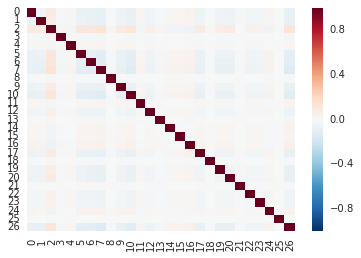

In [22]:
sns.heatmap(np.corrcoef(spca.named_steps['pca'].components_))
# show components are not correlaed with eahc itehr

In [23]:
'''
Partial least squares (PLS) regression
'''

# Create a pipeline that scales the data and performs PLS regression
spls = Pipeline([
    ('scale', preprocessing.StandardScaler()),
    ('pls', cross_dec.PLSRegression(scale=False))
])

# Train a PLS regression model with three components
# components capture the variance, capture the covariance of x and y at the same time, same thing happens
# first captures the most covariance and then second the remaining
spls.set_params(
    pls__n_components=3
)
spls.fit(boroughs, feelings)
# regresison model in a reduced way, so need to fit the model in the same way as linear model.

Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pls', PLSRegression(copy=True, max_iter=500, n_components=3, scale=False, tol=1e-06))])

In [24]:
# Define folds for cross-validation
# choosing folds we want to see how stable model is, so increase number of folds if model isnt.
kf = cv.KFold(len(feelings), n_folds=10, shuffle=True)

# Compute average MSE across folds
mses = cv.cross_val_score(spls, boroughs, feelings,\
                          scoring='mean_squared_error', cv=kf)
np.mean(-mses)

0.02596482244358405

In [25]:
feelings.head

<bound method DataFrame.head of                         Life satisfaction score 2011-14 (out of 10)  \
Area name                                                             
Barking and Dagenham                                            7.1   
Barnet                                                          7.5   
Bexley                                                          7.4   
Brent                                                           7.3   
Bromley                                                         7.5   
Camden                                                          7.1   
Croydon                                                         7.1   
Ealing                                                          7.3   
Enfield                                                         7.3   
Greenwich                                                       7.2   
Hackney                                                         7.0   
Hammersmith and Fulham                       

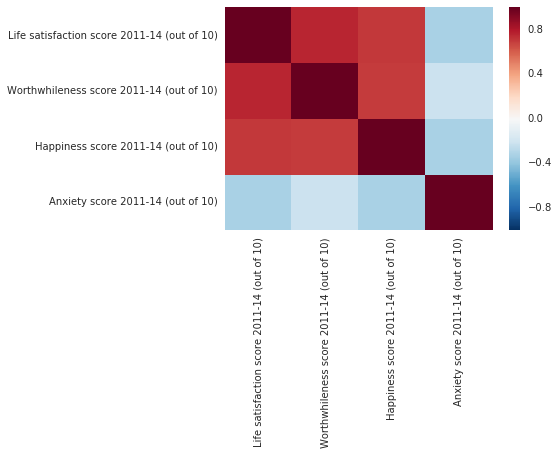

In [26]:
#feeligs extremeky correlated
sns.heatmap(feelings.corr())

In [27]:
# Determine ‘optimal’ number of components
gs = grid_search.GridSearchCV(
    estimator=spls,
    param_grid={
        'pls__n_components': np.arange(1, 10)
    },
    scoring='mean_squared_error',
    cv=kf
)
gs.fit(boroughs, feelings)

#not surpirsing 3 components looking at the plot of y because this is effectively saying 2 componets can explain the 
#variabliltiy in y and 1 will explain the variabilty in x

GridSearchCV(cv=sklearn.cross_validation.KFold(n=32, n_folds=10, shuffle=True, random_state=None),
       error_score='raise',
       estimator=Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pls', PLSRegression(copy=True, max_iter=500, n_components=3, scale=False, tol=1e-06))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'pls__n_components': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [28]:
-gs.best_score_

0.026314302581230749

In [29]:
gs.best_estimator_

Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pls', PLSRegression(copy=True, max_iter=500, n_components=3, scale=False, tol=1e-06))])

In [30]:
gs.grid_scores_

[mean: -0.03138, std: 0.02077, params: {'pls__n_components': 1},
 mean: -0.03006, std: 0.01965, params: {'pls__n_components': 2},
 mean: -0.02631, std: 0.01589, params: {'pls__n_components': 3},
 mean: -0.02979, std: 0.01736, params: {'pls__n_components': 4},
 mean: -0.03170, std: 0.01837, params: {'pls__n_components': 5},
 mean: -0.03693, std: 0.01982, params: {'pls__n_components': 6},
 mean: -0.03963, std: 0.02049, params: {'pls__n_components': 7},
 mean: -0.04462, std: 0.02013, params: {'pls__n_components': 8},
 mean: -0.04951, std: 0.02146, params: {'pls__n_components': 9}]

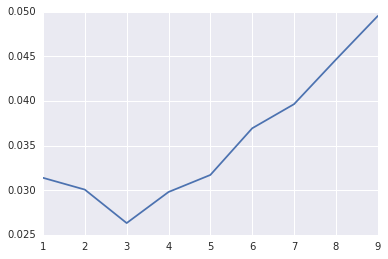

In [31]:
# Plot number of components against MSE
# 3 is the miminum, when we start increaisng componets, pls will extract but will extract noise from either trying to explain x
# or trying to explain y 
#from 1 to 3 capturing good variance and from 3 onwards its just capturing noise
# so if graph is just incraesing then it is just extracting noise and hence do not use pls
plt.plot(np.arange(1, 10), [ -x[1] for x in gs.grid_scores_ ])

In [33]:
# when doing pls the fiirst component will capture the greatest variability in y which is also correlated by y
pls=spls.named_steps['pls'] #same name as in pipeline, this allows us to access x and y scores

In [ ]:
# good for when you have more varibales than you do obsrvations.
# if you have alot of noise in x then this would be better than the standard regression. because effectivelt
# a normal regresison would try and correlate the random x with y (which ofcourse it isnt because of the noise)
# but what the pls would do would pick out the variability that is linked to y and say the noise would not be linked to y and
# hence disregard it.